In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

<h1>Data Analysis Mini-project using Pandas & Matplotlib</h1>
<h2>Student: Cezary Morawski</h2>
<h2>Index: 136075</h2>

<h4>Ex01 Read the data and view it</h4>
Important: add the parameter “encoding='latin1'” to pd.read_cvs() because the data is in Portuguese.
(‘á’ and ‘ç’ will generate an error).

In [2]:
df = pd.read_csv('amazon.csv', sep=',',encoding='latin1' , na_filter=True)
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


<h4>Ex02 The months in column "month" are in Portuguese. Change them to English.</h4>

In [3]:
print(df['month'].unique())

['Janeiro' 'Fevereiro' 'Março' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']


In [4]:
translate_dict = {'Janeiro':'January','Fevereiro':'February','Março':'March','Abril':'April','Maio':'May',
                  'Junho':'June','Julho':'July','Agosto':'August','Setembro':'September','Outubro':'October',
                 'Novembro':'November','Dezembro':'December'}

In [5]:
df['month'] = df['month'].map(translate_dict)


In [6]:
print(df['month'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


<h4>Ex03 Missing values in the state column: </h4>
a- Randomly delete 200 values from the state column;<br>
b- Check for the missing values in this column;<br>
c- Fill each missing value with that of the previous (or next) row.

In [7]:
i=0
while i<200:
    tmp = np.random.randint(len(df['state']))
    if not (pd.isna(df['state'].loc[tmp])):
        df['state'].loc[tmp] = np.NaN
        i+=1

/home/czarek/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
df.isnull().sum()

year        0
state     200
month       0
number      0
date        0
dtype: int64

In [9]:
tmp1 = df[df['state'].isnull() == True].index.tolist()
for i in tmp1:
    df['state'].loc[i] = df['state'].loc[i-1]

In [10]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

<h4>Ex04 Data reduction:</h4>
We would like to visualise the number of forest fires over the years, over the months. To this, we need to be able to identify smaller pieces of the bigger picture.
Let us drop rows from the dataset that are not contributing to the number of forest fires. Therefore, any row with number column value as 0, must be dropped. We first convert the 0s to NaN and then drop rows with NaN in the specific column number.

In [11]:
df['number'] = df['number'].apply(lambda x: np.nan if (x == 0) else x)
df.shape

(6454, 5)

In [12]:
df = df.dropna()
df.shape

(5837, 5)

<h4>Ex05</h4>
5. We want to group data per month and show the total number of fires for each month. The output should be in a Pandas series. You will notice that the output orders the months in alphabetical order. Transform it to a DataFrame and get it back to the monthly order.

In [13]:
months_cat = df['month'].unique()

data = df.groupby(['month']).agg({'number':'sum'})

data.index = pd.CategoricalIndex(data.index, categories=months_cat, ordered=True)

data.sort_index(inplace = True)

tmp = data.index
data.insert(0,'month',tmp)
data.reset_index(drop=True)

,month,number
0,January,47747.844
1,February,30848.050
2,March,30717.405
3,April,28188.770
4,May,34731.363
5,June,56010.675
6,July,92326.113
7,August,88050.435
8,September,58578.305
9,October,88681.579


<h4>Ex06</h4>
6. Finally, bar graph the DataFrame found in Question five. The bar graph should illustrate the number of forest fires per month.

<BarContainer object of 12 artists>

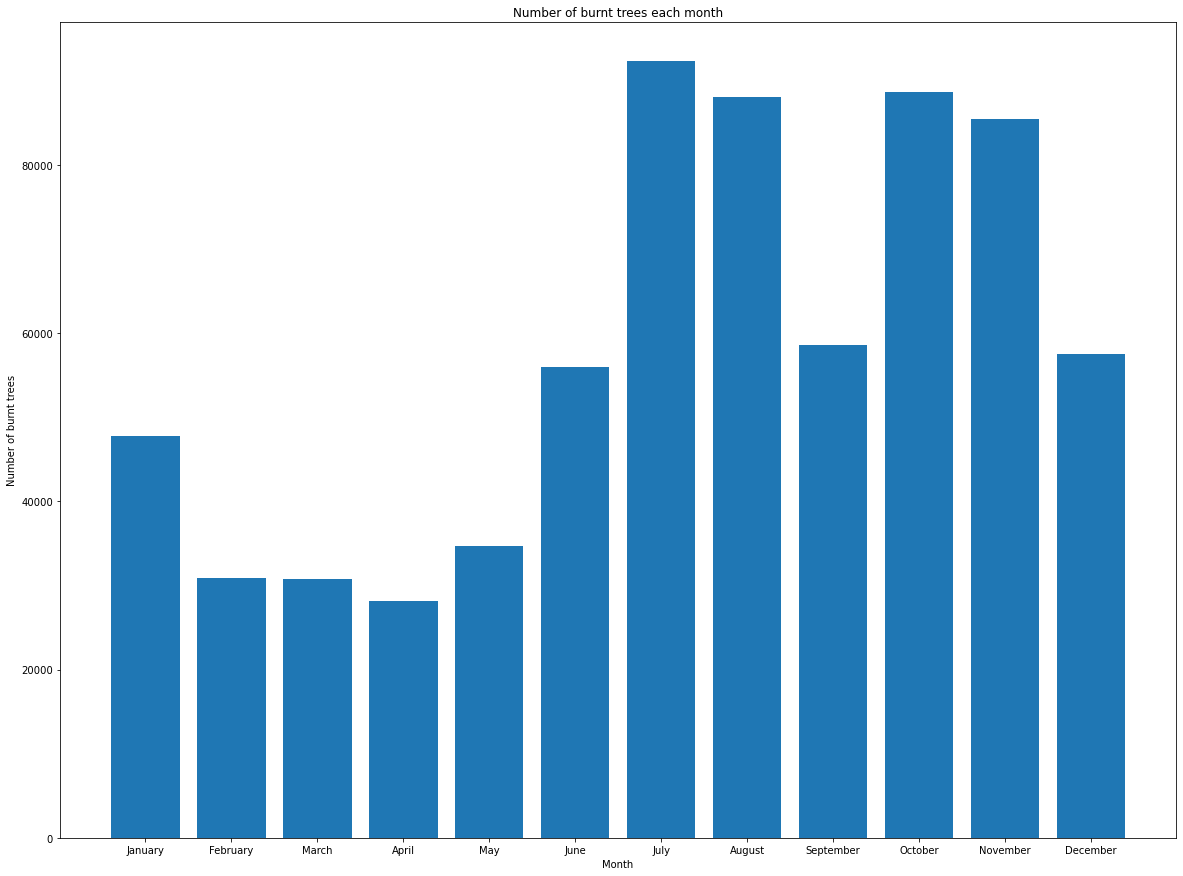

In [14]:
fig, ax = plt.subplots(figsize = (20,15))
plt.xlabel('Month')
plt.ylabel('Number of burnt trees')
plt.title('Number of burnt trees each month')
plt.bar(
    data.month,
    data.number,
)